# Reservoir routing

This short exercise is intended to illustrate the different aspects of a reservoir, using Python to solve the storage equation. It is based on the example below from Hingray (2015) 

<img src="img/reservoir.png" alt="drawing" width="400"/>


## Storage

The image above shows a detention basin with a rectangular cross section. In class, we calculated that its cross-sectional surface area, $A$, depends on the depth of water, $h$, as

$$A=2000+560h+32h^2.$$

We can get the storage volume, $S$, by integrating area over $h$

$$S=2000h+280h^2+32/3h^3.$$

***Exercise 1: in the cell below, complete the functions for $A$ and $S$, and plot their values for $h$ from 0 to 5 m.***

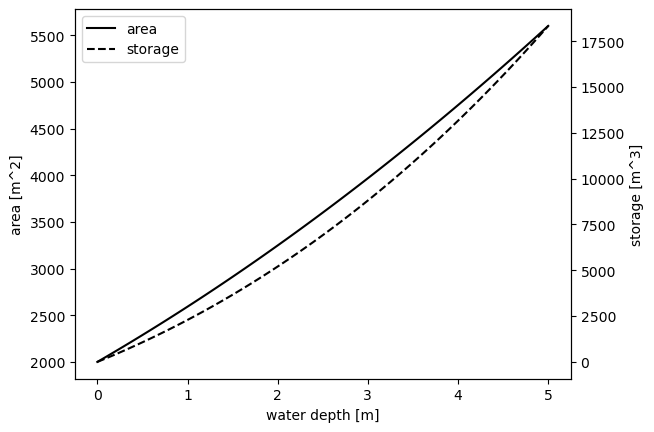

In [36]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# complete the functions below
def Af(h):    
    A=2000+560*h         # complete the calculation for area A
    return A

def Sf(h):
    S=2000*h              # complete the calculation for storage S
    return S

# plotting, don't change these commands
f,ax=plt.subplots(1,1)
h=np.linspace(0,5,101)
ax.plot(h,Af(h),'k-',label='area')
ax_=ax.twinx()
ax_.plot(h,Sf(h),'k--')
ax.plot([],[],'k--',label='storage')
ax.set_ylabel('area [m^2]')
ax_.set_ylabel('storage [m^3]')
ax.set_xlabel('water depth [m]')
ax.legend()

## Reservoir outflow

The reservoir has two discharge sites:
1. An orifice at its base, with diameter $d$=0.45 m and discharge coefficient, $C_0$=0.8.
2. An overflow spillway of length $L$=3.5m and discharge coefficient, $C_s$=3.0. The crest of the spillway is $h_c$=5 m.

Total discharge from the reservoir is written

$$ Q = C_0 \frac{\pi d^2}{4}\sqrt{2gh}+C_s L(h-h_c)^{3/2}$$

where the second term is only included for $h>h_c$.

***Exercise 2: in the cell below, complete the function for $Q$, and plot its value for $h$ from 0 to 5.5 m.***

Text(0.5, 0, 'water depth [m]')

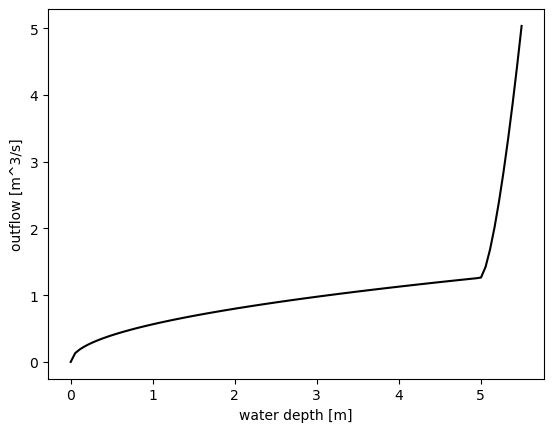

In [37]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# complete the function below
def _Qf(h): 
    Q=0.8                # complete the expression
    if h>hc:
        Q=Q+Cs          # complete the expression
    return Q

# this function vectorizes _Qf, don't modify it
def Qf(h):
    try:
        return np.array([_Qf(hi) for hi in h])
    except TypeError:
        return _Qf(h)
    
# plotting, don't change these commands
f,ax=plt.subplots(1,1)
h=np.linspace(0,5.5,101)
ax.plot(h,Qf(h),'k-')
ax.set_ylabel('outflow [m^3/s]')
ax.set_xlabel('water depth [m]')

## Solve the Reservoir Routing Equation

Reservoir routing balances inflows and outflow against changes in storage. We can write an equation for change in water depth as

$$ \frac{dh}{dt} = \frac{I(t)-Q(h)}{A(h)}$$

where $I(t)$ is the inflow hydrograph.

***Exercise 3: in the cell below, complete the function for $dhdt$. Hence, solve the routing equation for the given inflow hydrograph.***

Text(0, 0.5, 'water level [m]')

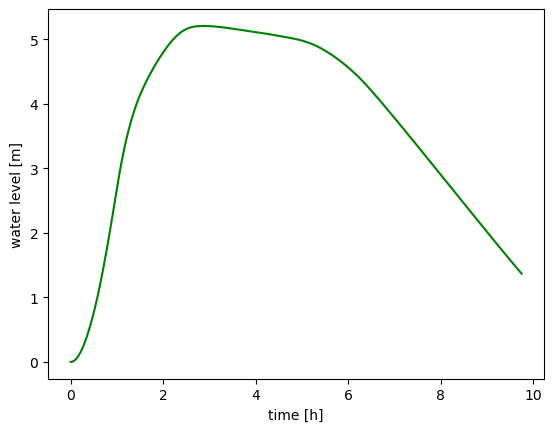

In [56]:
# inflow hydrograph function - don't change this
ti=np.array([0,30,60,90,120,150,180,210,240,270,300,330,360,390])*60.
Ii=np.array([0,2.4,5.6,3.4,2.8,2.4,2.2,1.8,1.5,1.2,1,0.56,0.34,0])
def If(t):
    return np.interp(t,ti,Ii)

# complete the inflow hydrograph function, using the previously defined functions, If, Qf and Af
def dhdtf(t,h): 
    dhdt=0.     # change this expression
    return dhdt

# solve the reservoir routing problem - don't change this
from scipy.integrate import solve_ivp
out=solve_ivp(dhdt, t_span=(ti[0], ti[-1]*1.5), y0=[0.], t_eval=np.linspace(ti[0], ti[-1]*1.5,1000), method='BDF')
t, h=out.t, out.y[0,:]
f,ax=plt.subplots(1,1)
ax.plot(t/3600, h, 'g-')
ax.set_xlabel('time [h]')
ax.set_ylabel('water level [m]')

## Analysing reservoir behaviour

When a reservoir is routing a flow, many things are changing at once: inflow, outflow, storage, water depth. 

***Exercise 4: run the cell below and answer the following questions.***

1. ***When does the spillway activate?***
2. ***When does the reservoir switch from filling to emptying?***
3. ***Does the reservoir provide flood protection?***
4. ***Double the size of the storm by changing the inflow hydrograph function to ```np.interp(t,ti,Ii)*2``` in the cell above. Then rerun that cell AND the one below. How does the reservoir respond?***

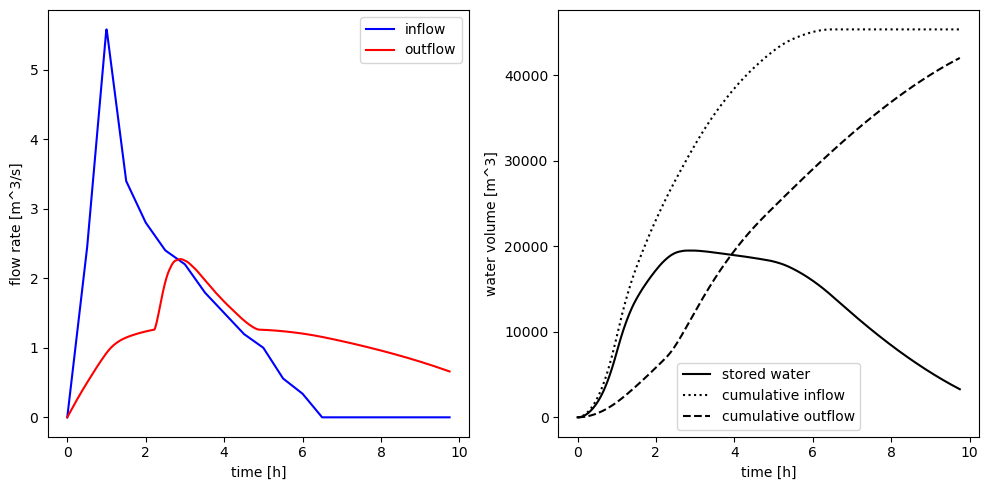

In [55]:
# don't change the code below
f,(ax,ax2)=plt.subplots(1,2,figsize=(10,5))
ax.plot(t/3600, If(t),'b-',label='inflow')
ax.plot(t/3600, Qf(h), 'r-', label='outflow')
ax.set_ylabel('flow rate [m^3/s]')
ax.set_xlabel('time [h]')
ax.legend()

ax2.plot(t/3600, Sf(h), 'k-', label='stored water')
ax2.plot(t/3600, np.cumsum(If(t))*(t[1]-t[0]), 'k:', label='cumulative inflow')
ax2.plot(t/3600, np.cumsum(Qf(h))*(t[1]-t[0]), 'k--', label='cumulative outflow')
ax2.set_ylabel('water volume [m^3]')
ax2.set_xlabel('time [h]')
ax2.legend()
plt.tight_layout()

## Solutions

If you're struggling to complete the exercises above, completed functions are available below.

In [ ]:
## Exercise 1
def Af(h):    
    A=2000+560*h+32*h**2    # complete the calculation for area A
    return A

def Sf(h):
    S=2000*h+280*h**2+32/3*h**3   # complete the calculation for storage S
    return S

## Exercise 2
def _Qf(h):              
    Q=0.8*3.142*0.45**2/4*np.sqrt(2*9.81*h)   # complete the expression
    if h>hc: 
        Q=Q+3.0*3.5*(h-5)**1.5     # complete the expression
    return Q

## Exercise 3
def dhdtf(t,h): 
    dhdt=(If(t)-Qf(h))/Af(h)       # change this expression
    return dhdt
